In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier

import pandas as pd
import numpy as np
from nmean import Nmean

In [2]:
def plot_series(X, title):
    idx_sample = np.array(range(len(X)), dtype=np.int32)
    np.random.shuffle(idx_sample)
    idx_sample = np.random.choice(idx_sample, 20, replace=False)
    X_sample = X[idx_sample]
    
    plt.figure(figsize=(12, 6))
    plt.title('clase: {0}'.format(title))
    for s in X_sample:
        plt.plot(s)
    plt.savefig('./eeg_experimento/Totalclase_{0}.svg'.format(title))
    plt.show()

In [3]:
series = pd.read_csv('../../Datos/EEG.csv')
series.drop('Unnamed: 0', axis=1, inplace=True)

X = series.drop('y', axis=1).values
y = series['y'].values.astype(np.int32)

y_5cat = y.copy()
y_2cat = y.copy()
y_2cat[y_2cat != 1] = 2

X_5cat = X.copy()
X_2cat = X.copy()

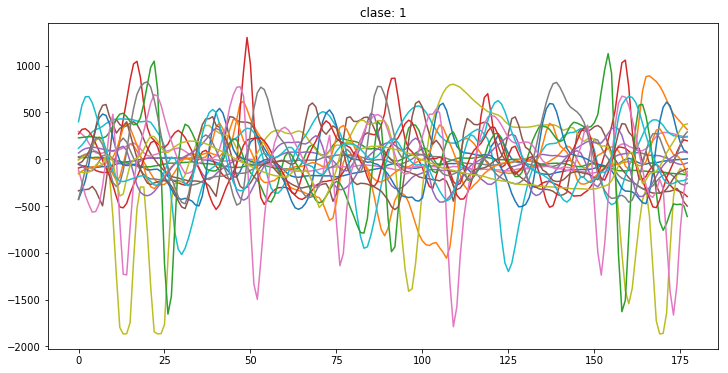

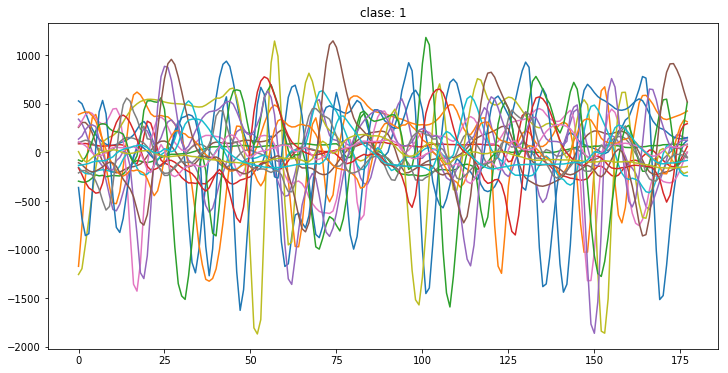

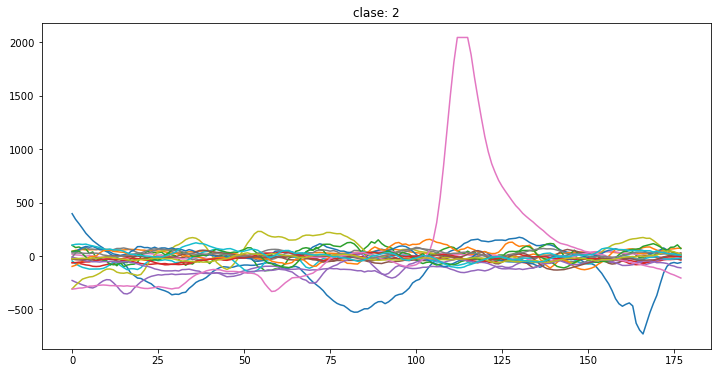

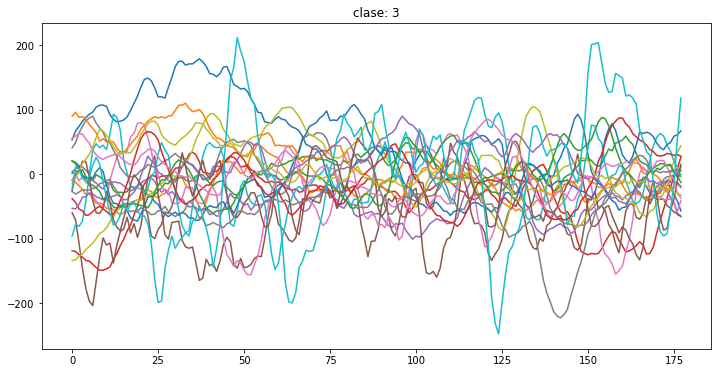

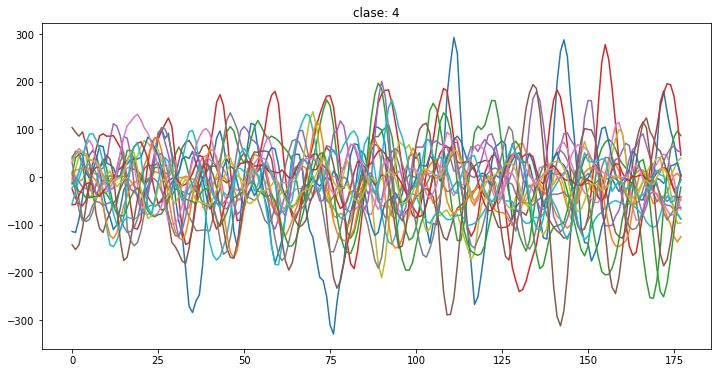

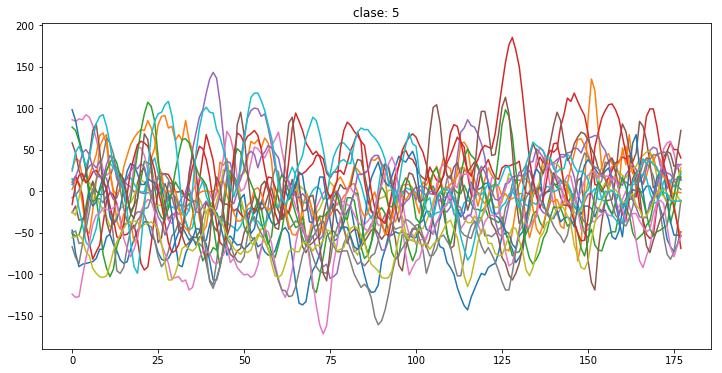

In [5]:
for clase in np.unique(y):
    mask_clase = y == clase
    X_clase = X[mask_clase]
    plot_series(X_clase, clase)

In [5]:
X_train_2cat, X_val_2cat, y_train_2cat, y_val_2cat = train_test_split(X_2cat, y_2cat, 
                                                                      test_size=0.2, random_state=2018)

X_train_5cat, X_val_5cat, y_train_5cat, y_val_5cat = train_test_split(X_5cat, y_5cat, 
                                                                      test_size=0.2, random_state=2018)

In [ ]:
params_ag = {'pop_size':100,
             'ngen':300,
             'batch_evaluate':True,
             'batch_size' : 0.005,
             'multi_jobs': True}

In [ ]:
kn2 = Nmean(verbose=1, params_ag=params_ag)
kn2.fit(X_train_2cat, y_train_2cat)
kn2.predict(X_val_2cat)

error = (kn2.labels != y_val_2cat).sum() / float(y_val_2cat.shape[0])
print('precision: {0}'.format(1 - error))

In [ ]:
kn5 = Nmean(verbose=1, params_ag=params_ag)
kn5.fit(X_train_5cat, y_train_5cat)
kn5.predict(X_val_5cat)

error = (kn5.labels != y_val_5cat).sum() / float(y_val_5cat.shape[0])
print('precision: {0}'.format(1 - error))

In [ ]:
print('2 classes results:')

nc_euclidean = NearestCentroid()
nc_euclidean.fit(X_train_2cat, y_train_2cat)
print(' Precicion Nearest Centroid: {0}'.format(nc_euclidean.score(X_val_2cat, y_val_2cat)))

knn_euclidean = KNeighborsClassifier(n_neighbors=1)
knn_euclidean.fit(X_train_2cat, y_train_2cat)
print(' Precision 1NN: {0}'.format(knn_euclidean.score(X_val_2cat, y_val_2cat)))

In [ ]:
print('5 classes results:')

nc_euclidean = NearestCentroid()
nc_euclidean.fit(X_train_5cat, y_train_5cat)
print(' Precicion Nearest Centroid: {0}'.format(nc_euclidean.score(X_val_5cat, y_val_5cat)))

knn_euclidean = KNeighborsClassifier(n_neighbors=1)
knn_euclidean.fit(X_train_5cat, y_train_5cat)
print(' Precision 1NN: {0}'.format(knn_euclidean.score(X_val_5cat, y_val_5cat)))

In [ ]:
for i, c in enumerate(kn2.centroids):
    plt.figure(figsize=(7, 4))
    plt.title('Clase:' + str(i+1))
    plt.plot(c)
    plt.savefig('./eeg_experimento/exp_2_centroides/clase_{0}.svg'.format(i+1))

In [ ]:
for i, c in enumerate(kn5.centroids):
    plt.figure(figsize=(7, 4))
    plt.title('Clase:' + str(i+1))
    plt.plot(c)
    plt.savefig('./eeg_experimento/exp_5_centroides/clase_{0}.svg'.format(i+1))

In [ ]:
for c in np.unique(y):
    mask = y == c
    X_sample = X[mask]
    for i in range(10):
        plt.figure(figsize=(7, 4))
        plt.plot(X_sample[i])
        plt.savefig('./eeg_experimento/series/clase_{0}_{1}.svg'.format(c, i))
        plt.show()